# Entanglement

This notebook demonstrates the concept of quantum entanglement.

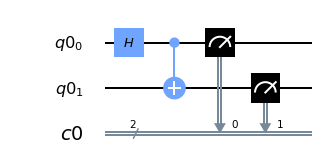

In [1]:
import qiskit
from qiskit.tools import monitor, visualization

qr = qiskit.QuantumRegister(2)
cr = qiskit.ClassicalRegister(2)
circuit = qiskit.QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw(output='mpl')

Let's simulate the circuit on a classical computer.

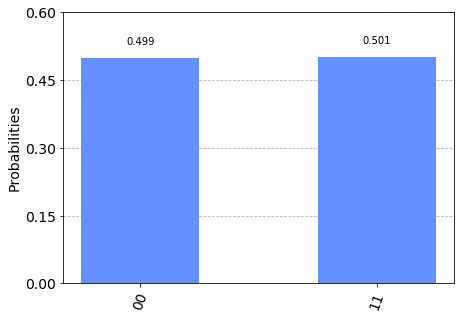

In [2]:
result = qiskit.execute(circuit, backend=qiskit.Aer.get_backend('qasm_simulator')).result()
visualization.plot_histogram(result.get_counts(circuit))

Now let's run it on a real quantum computer. Keep an eye on the job status in the output - it automatically updates in real time.

Remember to enter your IBM Quantum services API Token in the `token` variable.

Job Status: job has successfully run


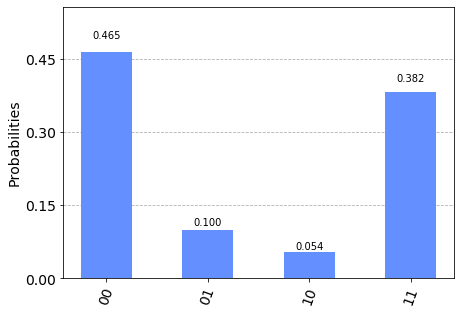

In [3]:
token = ''
qiskit.IBMQ.save_account(token, overwrite=True)
qiskit.IBMQ.load_account()
computer = qiskit.IBMQ.get_provider('ibm-q').get_backend('ibmq_16_melbourne')
job = qiskit.execute(circuit, backend=computer)
monitor.job_monitor(job)
result = job.result().get_counts(circuit)
visualization.plot_histogram(result)

Upon execution, we can see that today's quantum computers have a small, yet easily noticable, amount of error.